# Customer Segmentation and Behavioral Analysis Using K-Means

**Introducción**

El análisis de datos de clientes permite a las empresas comprender mejor los hábitos de consumo, preferencias y comportamientos de sus usuarios. En este proyecto se utiliza un conjunto de datos de una campaña de marketing para explorar características demográficas, patrones de compra y niveles de interacción de los clientes. A través de técnicas de análisis exploratorio y algoritmos de aprendizaje no supervisado, se busca identificar grupos homogéneos de clientes que puedan ser utilizados para diseñar estrategias comerciales más efectivas y personalizadas.

**Objetivo**

Aplicar técnicas de análisis estadístico y segmentación mediante el algoritmo K-Means, con el fin de identificar distintos perfiles de clientes en función de sus ingresos, hábitos de compra y nivel de interacción con la empresa. Esto permitirá comprender las diferencias clave entre los segmentos y facilitar la toma de decisiones en campañas de marketing y fidelización.

**Introduction**

Customer data analysis enables companies to better understand consumer behavior, preferences, and spending patterns. In this project, we use a marketing campaign dataset to explore customer demographics, purchase behavior, and engagement levels. Through exploratory data analysis and unsupervised machine learning techniques, we aim to identify homogeneous groups of customers that can support the design of more effective and personalized business strategies.

**Objective**

To apply statistical analysis and segmentation using the K-Means algorithm in order to identify distinct customer profiles based on their income, purchasing habits, and level of interaction with the company. This will help uncover key differences between segments and support decision-making in marketing and customer retention efforts.

In [1]:
#Cargar librerías necesarias
library(tidyverse)
library(lubridate)

# Leer el archivo con separador de tabulaciones
df <- read_delim("/kaggle/input/customer-personality-analysis/marketing_campaign.csv", delim = "\t")

# Ver estructura del dataframe
glimpse(df)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Rows: 2240 Columns: 29


── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): Education, Marital_Status, Dt_Customer
dbl (26): ID, Year_Birth, Income, Kidhome, Teenhome, Recency, MntWines, MntF...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 2,240
Columns: 29
$ ID                  <dbl> 5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 485…
$ Year_Birth          <dbl> 1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 19…
$ Education           <chr> "Graduation", "Graduation", "Graduation", "Graduat…
$ Marital_Status      <chr> "Single", "Single", "Together", "Together", "Marri…
$ Income              <dbl> 58138, 46344, 71613, 26646, 58293, 62513, 55635, 3…
$ Kidhome             <dbl> 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,…
$ Teenhome            <dbl> 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,…
$ Dt_Customer         <chr> "04-09-2012", "08-03-2014", "21-08-2013", "10-02-2…
$ Recency             <dbl> 58, 38, 26, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82…
$ MntWines            <dbl> 635, 11, 426, 11, 173, 520, 235, 76, 14, 28, 5, 6,…
$ MntFruits           <dbl> 88, 1, 49, 4, 43, 42, 65, 10, 0, 0, 5, 16, 61, 2, …
$ MntMeatProducts     <dbl> 546, 6, 127, 20, 118, 98, 164, 56, 24, 6, 6, 11, 4…
$ MntFishProduct

In [2]:
# Resumen estadístico de variables numéricas
summary(df)

# Revisión rápida de columnas categóricas
df %>% 
  select(where(is.character)) %>% 
  map_df(~n_distinct(.), .id = "Variable") %>% 
  rename("Valores únicos" = 1)

       ID          Year_Birth    Education         Marital_Status    
 Min.   :    0   Min.   :1893   Length:2240        Length:2240       
 1st Qu.: 2828   1st Qu.:1959   Class :character   Class :character  
 Median : 5458   Median :1970   Mode  :character   Mode  :character  
 Mean   : 5592   Mean   :1969                                        
 3rd Qu.: 8428   3rd Qu.:1977                                        
 Max.   :11191   Max.   :1996                                        
                                                                     
     Income          Kidhome          Teenhome      Dt_Customer       
 Min.   :  1730   Min.   :0.0000   Min.   :0.0000   Length:2240       
 1st Qu.: 35303   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median : 51382   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   : 52247   Mean   :0.4442   Mean   :0.5062                     
 3rd Qu.: 68522   3rd Qu.:1.0000   3rd Qu.:1.0000                     
 Max.   :66666

Valores únicos,Marital_Status,Dt_Customer
<int>,<int>,<int>
5,8,663


**Variables numéricas**

Income tiene valores muy elevados (máximo de 666,666) lo que indica outliers. Además, hay 24 valores faltantes.

Las variables de gasto (MntWines, MntFruits, etc.) tienen amplia dispersión y máximos elevados → Usar boxplots para detectar outliers.

Z_CostContact y Z_Revenue son constantes (siempre 3 y 11). No aportan valor al análisis → se eliminarán.

Las variables AcceptedCmp*, Complain y Response son binarias (0/1).

**Variables categóricas**

Education: 5 niveles

Marital_Status: 8 niveles (probablemente hay que reagrupar: eg. "Alone", "Together", etc.)

Dt_Customer: 663 valores únicos → vamos a transformarla a tipo fecha.

In [3]:
# 1. Eliminar columnas constantes
df <- df %>% select(-Z_CostContact, -Z_Revenue)

# 2. Convertir fecha
df <- df %>% mutate(Dt_Customer = dmy(Dt_Customer))

# 3. Crear antigüedad del cliente
df <- df %>% mutate(Years_Customer = as.numeric(difftime(Sys.Date(), Dt_Customer, units = "days")) / 365)

# 4. Verificar valores faltantes
colSums(is.na(df))

# 5. Crear una nueva variable de gasto total
df <- df %>% mutate(Total_Spent = MntWines + MntFruits + MntMeatProducts +
                    MntFishProducts + MntSweetProducts + MntGoldProds)

ID          Year_Birth           Education      Marital_Status 
                  0                   0                   0                   0 
             Income             Kidhome            Teenhome         Dt_Customer 
                 24                   0                   0                   0 
            Recency            MntWines           MntFruits     MntMeatProducts 
                  0                   0                   0                   0 
    MntFishProducts    MntSweetProducts        MntGoldProds   NumDealsPurchases 
                  0                   0                   0                   0 
    NumWebPurchases NumCatalogPurchases   NumStorePurchases   NumWebVisitsMonth 
                  0                   0                   0                   0 
       AcceptedCmp3        AcceptedCmp4        AcceptedCmp5        AcceptedCmp1 
                  0                   0                   0                   0 
       AcceptedCmp2            Complain            Response      Years_Customer 
                  0                   0                   0                   0

In [4]:
# Agrupar por Educación y calcular ingreso y gasto promedio
df %>%
  group_by(Education) %>%
  summarise(
    Ingreso_Promedio = mean(Income, na.rm = TRUE),
    Gasto_Total_Prom = mean(Total_Spent, na.rm = TRUE),
    Clientes = n()
  ) %>%
  arrange(desc(Gasto_Total_Prom))

# Agrupar por Estado Civil
df %>%
  group_by(Marital_Status) %>%
  summarise(
    Ingreso_Promedio = mean(Income, na.rm = TRUE),
    Gasto_Total_Prom = mean(Total_Spent, na.rm = TRUE),
    Clientes = n()
  ) %>%
  arrange(desc(Gasto_Total_Prom))

Education,Ingreso_Promedio,Gasto_Total_Prom,Clientes
<chr>,<dbl>,<dbl>,<int>
PhD,56145.31,672.4095,486
Graduation,52720.37,619.8988,1127
Master,52917.53,611.7811,370
2n Cycle,47633.19,496.5271,203
Basic,20306.26,81.7963,54


Marital_Status,Ingreso_Promedio,Gasto_Total_Prom,Clientes
<chr>,<dbl>,<dbl>,<int>
Absurd,72365.50,1192.5000,2
Widow,56481.55,738.8182,77
Divorced,52834.23,610.6293,232
Together,53245.53,608.3879,580
Single,50995.35,606.4833,480
Married,51724.98,590.8021,864
YOLO,48432.00,424.0000,2
Alone,43789.00,256.6667,3


**Insight:** Los clientes con mayor educación formal (PhD, Master) tienen mayor poder adquisitivo y gasto total promedio. El grupo "Basic" es significativamente menos valioso comercialmente.

**Insight:** Aunque hay categorías extrañas como YOLO, los clientes "Widow", "Together", "Divorced" y "Single" gastan más que los casados. Estos segmentos podrían ser más rentables para campañas específicas.

In [5]:
# Filtrar solo columnas numéricas
df_num <- df %>% 
  select(where(is.numeric)) %>% 
  drop_na()

# Calcular correlación
cor_matrix <- cor(df_num)

# Convertir a tibble ordenada de pares de variables
library(tidyverse)

cor_df <- as.data.frame(as.table(cor_matrix)) %>%
  filter(Var1 != Var2) %>%
  mutate(abs_cor = abs(Freq)) %>%
  arrange(desc(abs_cor)) %>%
  filter(abs_cor >= 0.5)

# Eliminar duplicados simétricos
cor_df_unique <- cor_df %>%
  rowwise() %>%
  mutate(pair = paste(sort(c(Var1, Var2)), collapse = "-")) %>%
  distinct(pair, .keep_all = TRUE) %>%
  select(Var1, Var2, Correlacion = Freq) %>%
  arrange(desc(abs(Correlacion)))

cor_df_unique

Var1,Var2,Correlacion
<fct>,<fct>,<dbl>
Total_Spent,MntWines,0.8931357
Total_Spent,MntMeatProducts,0.8458842
Total_Spent,NumCatalogPurchases,0.7804818
NumCatalogPurchases,MntMeatProducts,0.7341266
Total_Spent,NumStorePurchases,0.6751811
Total_Spent,Income,0.6675761
Total_Spent,MntFishProducts,0.6423708
NumStorePurchases,MntWines,0.6400119
NumCatalogPurchases,MntWines,0.6347527


**Correlación Positiva**

| Variables Relacionadas                    | Correlación | Interpretación                                                              |
| ----------------------------------------- | ----------- | --------------------------------------------------------------------------- |
| `Total_Spent` – `MntWines`                | **0.89**    | Gran parte del gasto total proviene del vino.                               |
| `Total_Spent` – `MntMeatProducts`         | **0.85**    | Los productos cárnicos también representan un gasto importante.             |
| `Total_Spent` – `NumCatalogPurchases`     | **0.78**    | Los clientes que más gastan tienden a comprar mediante catálogos.           |
| `NumCatalogPurchases` – `MntMeatProducts` | **0.73**    | Quienes compran por catálogo también tienden a consumir productos cárnicos. |
| `Total_Spent` – `NumStorePurchases`       | **0.68**    | El gasto total también está relacionado con compras en tienda física.       |
| `Total_Spent` – `Income`                  | **0.67**    | A mayor ingreso, mayor gasto total (aunque no es una correlación perfecta). |
| `NumCatalogPurchases` – `Income`          | **0.59**    | Los clientes con más ingresos compran más a través de catálogos.            |


**Correlación Negativa**

| Variables Relacionadas                      | Correlación | Interpretación                                                        |
| ------------------------------------------- | ----------- | --------------------------------------------------------------------- |
| `Total_Spent` – `Kidhome`                   | **-0.56**   | Las personas con más hijos pequeños tienden a gastar menos.           |
| `NumWebVisitsMonth` – `Income`              | **-0.55**   | A menor ingreso, más visitas al sitio web (posiblemente sin comprar). |
| `NumWebVisitsMonth` – `NumCatalogPurchases` | **-0.52**   | Quienes compran más por catálogo visitan menos el sitio web.          |
| `NumStorePurchases` – `Kidhome`             | **-0.50**   | Más hijos en casa → menos compras en tienda física.                   |


# Segmentación de clientes con K-means

In [6]:
# Seleccionamos solo las variables numéricas para la segmentación
datos_numericos <- df %>%
  select(Income, Recency, NumWebPurchases, NumCatalogPurchases,
         NumStorePurchases, NumWebVisitsMonth,
         MntWines, MntFruits, MntMeatProducts, MntFishProducts,
         MntSweetProducts, MntGoldProds, Total_Spent)

# Eliminamos filas con NA, NaN o Inf
datos_numericos <- datos_numericos %>%
  filter(if_all(everything(), ~ !is.na(.) & is.finite(.)))

# Escalamos los datos
datos_escalados <- scale(datos_numericos)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



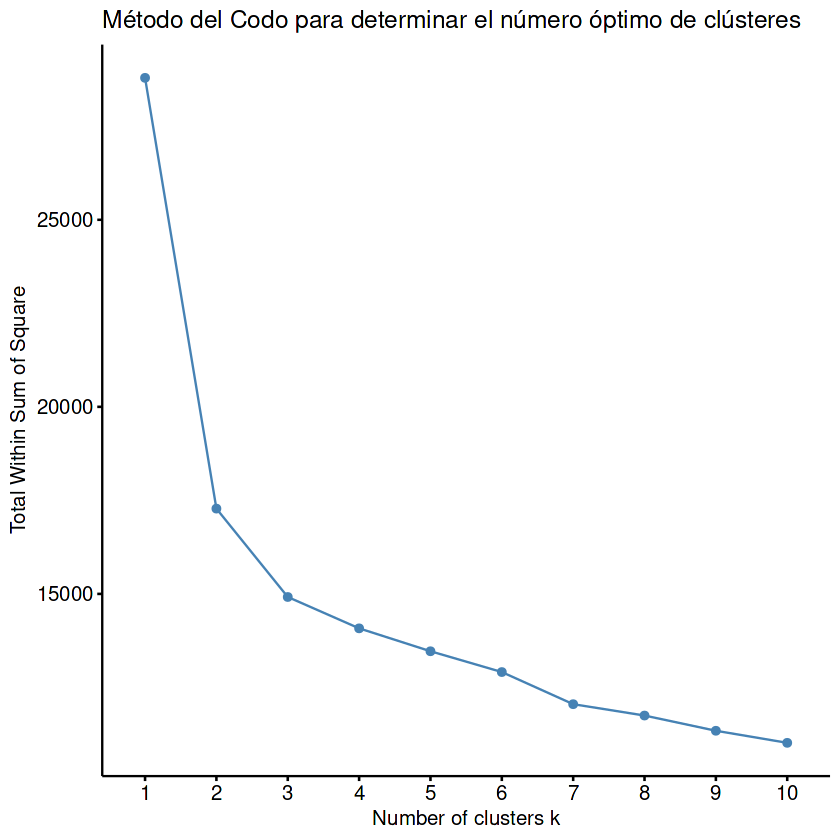

In [7]:
# Paquete necesario
library(factoextra)

# Calcular WSS para k = 1 a 10
set.seed(123)  # para reproducibilidad
fviz_nbclust(datos_escalados, kmeans, method = "wss") +
  labs(title = "Método del Codo para determinar el número óptimo de clústeres")

In [8]:
# Fijamos la semilla para reproducibilidad
set.seed(123)

# Aplicamos k-means con k = 4
kmeans_resultado <- kmeans(datos_escalados, centers = 4, nstart = 25)

# Verificamos resultados
print(kmeans_resultado)

# Agregamos la información del cluster al dataframe original
datos_segmentados <- datos_numericos %>%
  mutate(Cluster = kmeans_resultado$cluster)

# Ver resumen por cluster
datos_segmentados %>%
  group_by(Cluster) %>%
  summarise(across(everything(), mean), .groups = "drop")


K-means clustering with 4 clusters of sizes 296, 1044, 530, 346

Cluster means:
      Income      Recency NumWebPurchases NumCatalogPurchases NumStorePurchases
1  0.8604357 -0.029845801       0.4951853          0.97236830         0.8396165
2 -0.6817242  0.007703264      -0.7164087         -0.72575584        -0.7876779
3  0.1950649 -0.089273943       0.8596361          0.04535592         0.5377359
4  1.0221004  0.139038551       0.4212390          1.28852438         0.8347086
  NumWebVisitsMonth   MntWines  MntFruits MntMeatProducts MntFishProducts
1        -0.9533793  0.5864340  1.7945166       1.1057174       1.7542379
2         0.4667789 -0.7745588 -0.5432133      -0.6430777      -0.5623693
3         0.1734091  0.3340820 -0.1540818      -0.2015464      -0.1745414
4        -0.8584500  1.3236747  0.3398875       1.3031802       0.4634859
  MntSweetProducts MntGoldProds Total_Spent
1        1.7147235    0.9836297   1.2185558
2       -0.5410349   -0.5641290  -0.8448680
3       -0.1390703

Cluster,Income,Recency,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spent
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,73907.06,48.14865,5.442568,5.5168919,8.530405,3.006757,502.9122,97.766892,414.98986,133.685811,97.456081,94.93243,1341.74324
2,35086.16,49.23563,2.121648,0.5469349,3.240421,6.451149,43.8113,4.739464,22.76437,6.846743,4.807471,14.73467,97.70402
3,57157.64,46.42830,6.441509,2.8037736,7.549057,5.739623,417.7868,20.224528,121.79245,28.081132,21.316981,60.03208,669.23396
4,77976.66,53.03757,5.239884,6.4421965,8.514451,3.236994,751.6040,39.881503,459.27746,63.014451,42.578035,63.95087,1420.30636


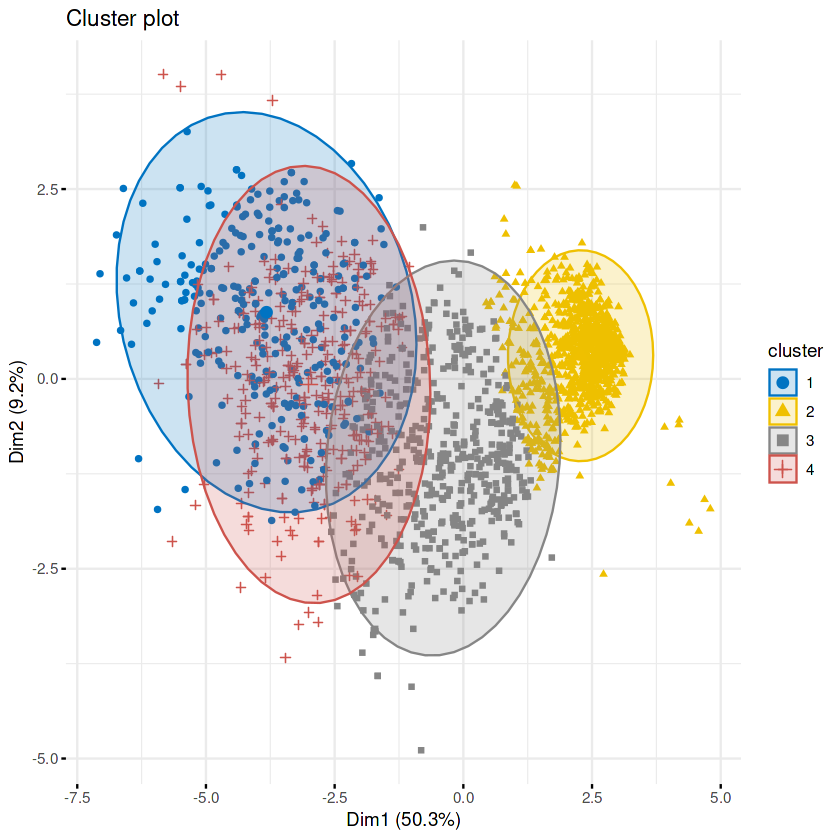

In [9]:
library(factoextra)

# Visualización de los clusters
fviz_cluster(kmeans_resultado, data = datos_escalados,
             palette = "jco", ellipse.type = "norm",
             geom = "point", show.clust.cent = TRUE,
             ggtheme = theme_minimal())

In [10]:
#Seleccionar solo las columnas numéricas
datos_numericos <- df %>%
  select(Income, Recency, NumWebPurchases, NumCatalogPurchases,
         NumStorePurchases, NumWebVisitsMonth,
         MntWines, MntFruits, MntMeatProducts, MntFishProducts,
         MntSweetProducts, MntGoldProds, Total_Spent)

# Filtrar los datos completos
df_limpio <- df[complete.cases(datos_numericos), ]
datos_numericos_limpios <- datos_numericos[complete.cases(datos_numericos), ]

#Escalar
datos_escalados <- scale(datos_numericos_limpios)

# K-means con 3 clusters
set.seed(123)  # para reproducibilidad
kmeans_resultado <- kmeans(datos_escalados, centers = 3, nstart = 25)

# Agregar la columna de cluster
df_clustered <- df_limpio %>%
  mutate(Cluster = factor(kmeans_resultado$cluster))

# Estadísticas por cluster
library(dplyr)

resumen_clusters <- df_clustered %>%
  group_by(Cluster) %>%
  summarise(
    Clientes = n(),
    Ingreso_Promedio = mean(Income, na.rm = TRUE),
    Gasto_Total_Prom = mean(Total_Spent, na.rm = TRUE),
    Recency_Prom = mean(Recency, na.rm = TRUE),
    Compras_Web = mean(NumWebPurchases),
    Compras_Catalogo = mean(NumCatalogPurchases),
    Compras_Tienda = mean(NumStorePurchases),
    Visitas_Web = mean(NumWebVisitsMonth)
  ) %>%
  arrange(desc(Gasto_Total_Prom))

print(resumen_clusters)


# A tibble: 3 × 9
  Cluster Clientes Ingreso_Promedio Gasto_Total_Prom Recency_Prom Compras_Web
  <fct>      <int>            <dbl>            <dbl>        <dbl>       <dbl>
1 3            546           77379.            1421.         51.1        5.24
2 2            596           59513.             767.         46.9        6.41
3 1           1074           35439.             105.         49.2        2.21
# ℹ 3 more variables: Compras_Catalogo <dbl>, Compras_Tienda <dbl>,
#   Visitas_Web <dbl>


| Clúster | Nº Clientes | Ingreso Promedio | Gasto Total Promedio | Interpretación                                                                                                                                                   |
| ------: | ----------: | ---------------: | -------------------: | ---------------------------------------------------------------------------------------------------------------------------------------------------------------- |
|   **1** |       1,074 |         \$35,439 |                \$105 | **Clientes con bajos ingresos y bajo gasto**. Probablemente más sensibles al precio. Baja frecuencia de compra online y tienda. Pueden necesitar promociones. |
|   **2** |         596 |         \$59,513 |                \$767 | **Clientes intermedios**. Buen poder adquisitivo y buen nivel de gasto. Altas compras web y catálogo. Segmento ideal para fidelización.                       |
|   **3** |         546 |         \$77,379 |              \$1,421 | **Clientes premium**. Altos ingresos y gasto promedio. Compran mucho en tienda y online. Segmento clave para personalización y retención VIP.                 |


| Clúster | Recomendación                                                                                    |
| ------: | ------------------------------------------------------------------------------------------------ |
|   **1** | Ofertas agresivas, productos de bajo costo, descuentos por volumen.                              |
|   **2** | Programas de fidelización, campañas multicanal (web y catálogo), recomendaciones personalizadas. |
|   **3** | Marketing exclusivo, early access a productos, servicio personalizado.                           |

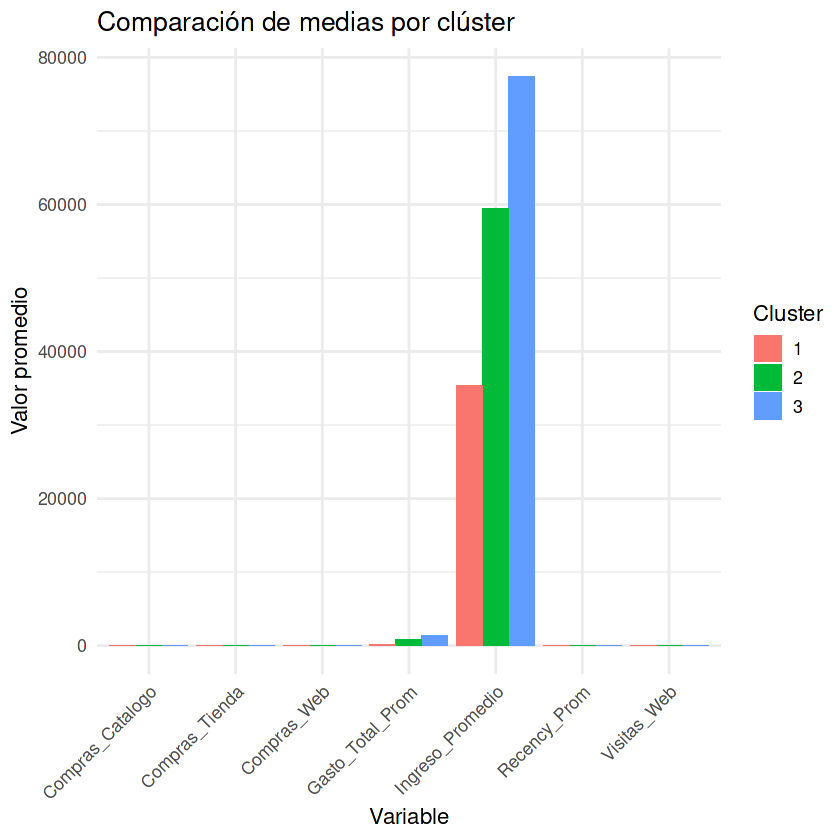

In [11]:
library(ggplot2)
library(tidyr)

# Convertimos a formato largo
datos_largos <- resumen_clusters %>%
  pivot_longer(cols = -Cluster, names_to = "Variable", values_to = "Valor") %>%
  filter(Variable != "Clientes")  # opcional, si no deseas incluir Clientes

# Gráfico
ggplot(datos_largos, aes(x = Variable, y = Valor, fill = Cluster)) +
  geom_col(position = "dodge") +
  theme_minimal(base_size = 13) +
  labs(title = "Comparación de medias por clúster", y = "Valor promedio", x = "Variable") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

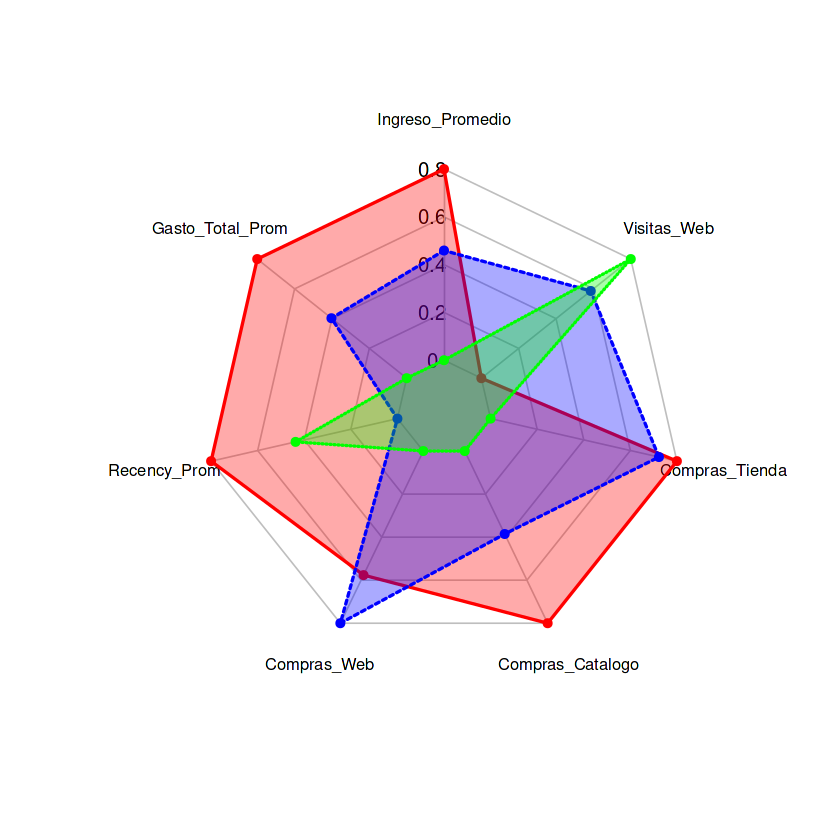

In [12]:
library(fmsb)

# Normalizamos las variables entre 0 y 1
resumen_norm <- resumen_clusters %>%
  select(-Clientes, -Cluster) %>%
  mutate_all(scales::rescale)

# Preparamos los datos para radar
data_radar <- as.data.frame(resumen_norm)
data_radar <- rbind(rep(1, ncol(data_radar)), rep(0, ncol(data_radar)), data_radar)
rownames(data_radar) <- c("Max", "Min", paste("Cluster", resumen_clusters$Cluster))

# Radar plot
radarchart(data_radar,
           axistype = 1,
           pcol = c("red", "blue", "green"),
           pfcol = c("#FF000055", "#0000FF55", "#00FF0055"),
           plwd = 2,
           cglcol = "grey",
           cglty = 1,
           axislabcol = "black",
           caxislabels = seq(0, 1, 0.2),
           vlcex = 0.8)
legend("topright", legend = paste("Cluster", resumen_clusters$Cluster),
       col = c("red", "blue", "green"), lty = 1, lwd = 2, bty = "n")